In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading the file in a dataframe
cars_2020 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/vehicles2020.csv')
cars_2020.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,19UUA8F22CA003926,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,gas,115120.0,clean,automatic,NaN,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,gas,212526.0,clean,automatic,5J6YH18314L006498,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,NaN,clean,automatic,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [ ]:
cars_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [ ]:
# counting number of null values present in each column
cars_2020.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               987
manufacturer     23584
model             8013
condition       236052
cylinders       218495
fuel              3393
odometer         98976
title_status      2940
transmission      3973
vin             224410
drive           155772
size            371209
type            147469
paint_color     174239
image_url           19
description         21
county          539759
state                0
lat               8974
long              8974
dtype: int64

## Feature Selection

In [ ]:
# dropping the columns which we dont need 
# also dropping column 'county' because all are null values
cols_to_drop = ['id','url','region','region_url','vin','image_url','description','county','lat','long']
cars_2020.drop(columns = cols_to_drop,inplace=True)
cars_2020.isnull().sum()

price                0
year               987
manufacturer     23584
model             8013
condition       236052
cylinders       218495
fuel              3393
odometer         98976
title_status      2940
transmission      3973
drive           155772
size            371209
type            147469
paint_color     174239
state                0
dtype: int64

In [ ]:
# dropping dupilcates entries in row 
cars_2020.drop_duplicates(inplace=True)
print(cars_2020.shape)

(417407, 15)


In [ ]:
cars_2020.describe()

,price,year,odometer
count,4.174070e+05,416648.000000,3.391910e+05
mean,2.272412e+05,2009.351899,1.021454e+05
std,2.415659e+07,9.778000,1.619792e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,4.400000e+03,2006.000000,4.723250e+04
50%,9.000000e+03,2011.000000,9.400000e+04
75%,1.722500e+04,2015.000000,1.391530e+05
max,4.294967e+09,2021.000000,6.480922e+07


## Handling Outliers

**Price**

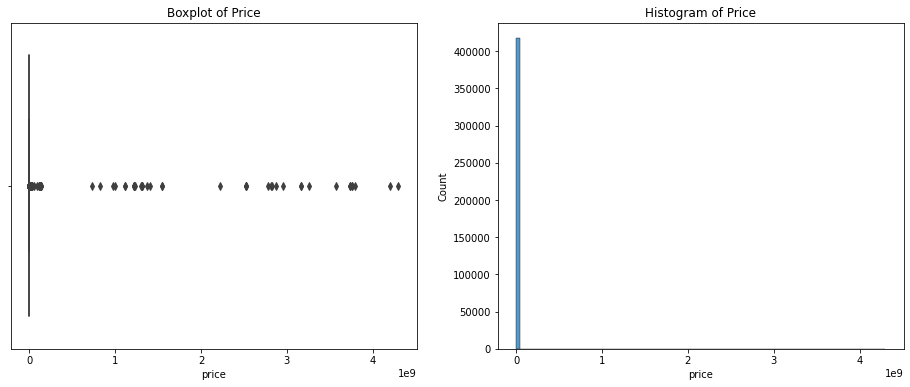

In [ ]:
# boxplot and histogram of price features to better understand position of outliers
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='price',data=cars_2020)
plt.title('Boxplot of Price')
plt.subplot(1,2,2)
sns.histplot(x='price',data=cars_2020,bins=100)
plt.title('Histogram of Price')
plt.show()

According to the info and plots, the price ranges between 0 and $4.3 billion which is unreasonable, and the distribution is highly right skewed. 

** Use logarithm transformation and apply 3-sigma rules**

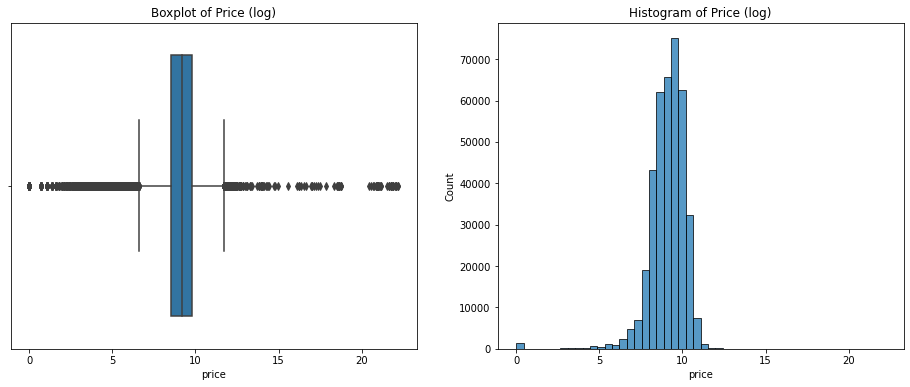

In [ ]:
# remove 0 values because log may create problems
cars_2020 = cars_2020[cars_2020['price']!=0]

# #logarithm transformation
price_log = np.log(cars_2020['price'])

# boxplot and histogram to better understand outliers 
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x=price_log)
plt.title('Boxplot of Price (log)')
plt.subplot(1,2,2)
sns.histplot(x=price_log,bins=50)
plt.title('Histogram of Price (log)')
plt.show()

It seems the log data be in line with log normal. So we will remove the outliers of price_log by using 3 sigma rules.

In [ ]:
# #caculating upper limit and lower limit

upper_limit =np.exp(price_log.mean()+3*price_log.std())
lower_limit =np.exp(price_log.mean()-3*price_log.std())
print('The upper limit of price is {}'.format(upper_limit))
print('The lower limit of price is {}'.format(lower_limit))


The upper limit of price is 256824.48820628406
The lower limit of price is 310.830538470513


In [ ]:
# remove other outliers of price
print(cars_2020.shape)
a = cars_2020['price']
cars_2020=cars_2020[(a>lower_limit) & (a<upper_limit)]
print(cars_2020.shape)

(388801, 15)
(384189, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


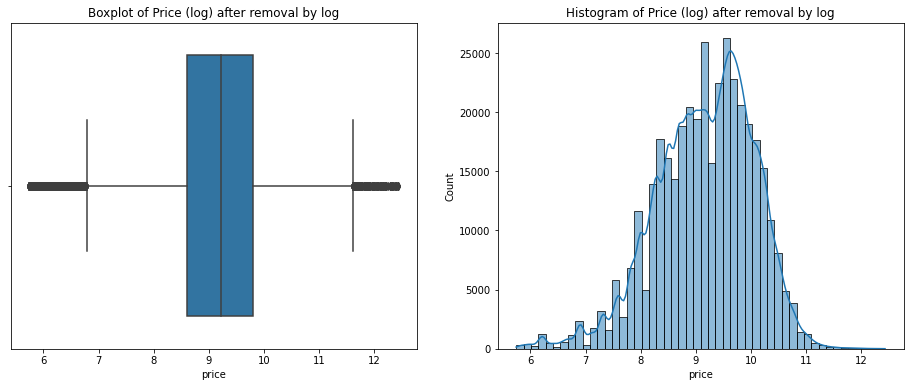

In [ ]:
#boxplot and histplot after romoving by log data and 3 sigma
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(np.log(cars_2020['price']))
plt.title('Boxplot of Price (log) after removal by log')
plt.subplot(1,2,2)
sns.histplot(np.log(cars_2020['price']),kde=True,bins=50)
plt.title('Histogram of Price (log) after removal by log')
plt.show()

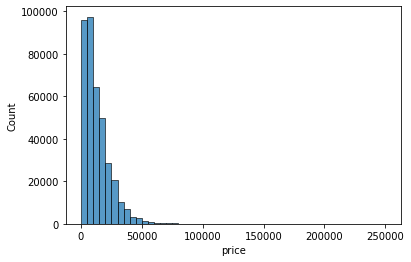

In [ ]:
sns.histplot(cars_2020['price'],bins=50)

In [ ]:
# storing the 95% quantile 
quantile_99=cars_2020['price'].quantile(0.9985)
quantile_99

83358.99999999674

In [ ]:
#remove other outliers of price based on the quantile chosen
print(cars_2020.shape)
cars_2020=cars_2020[cars_2020['price']<quantile_99]
print(cars_2020.shape)

(384189, 15)
(383612, 15)


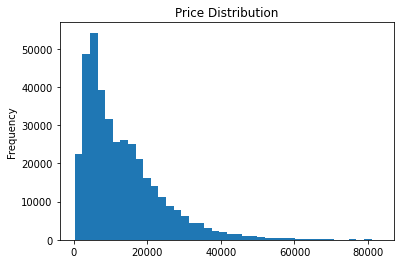

In [ ]:
cars_2020['price'].plot(kind='hist',bins=40,title='Price Distribution')

**year**

We keep cars less than 30 years.

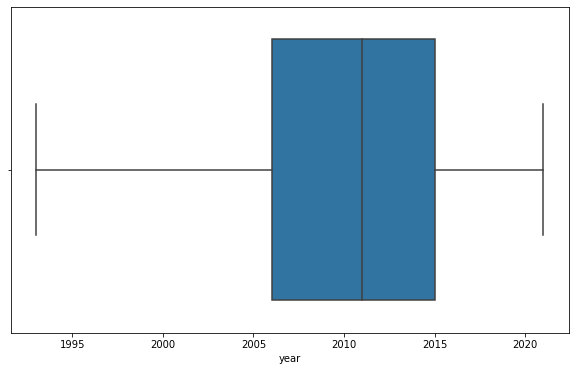

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',data=cars_2020,showfliers=False)

In [ ]:
# removing cars greater than 30years and converting to int type 
print(cars_2020.shape)
cars_2020 = cars_2020[(cars_2020['year']>=1990) & (cars_2020['year']<=2020)]
cars_2020['year'] = cars_2020['year'].astype(int)
print(cars_2020.shape)

(383612, 15)
(370293, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#After removing outlier of price(log-3σ) and year(recent 30 years)
cars_2020.describe()

,price,year,odometer
count,370293.000000,370293.000000,3.063990e+05
mean,13244.004577,2010.352556,1.042805e+05
std,10567.746843,5.829901,1.588456e+05
min,311.000000,1990.000000,0.000000e+00
25%,5455.000000,2007.000000,4.972300e+04
50%,10000.000000,2011.000000,9.700000e+04
75%,17995.000000,2015.000000,1.418095e+05
max,83000.000000,2020.000000,6.480922e+07


**odometer**

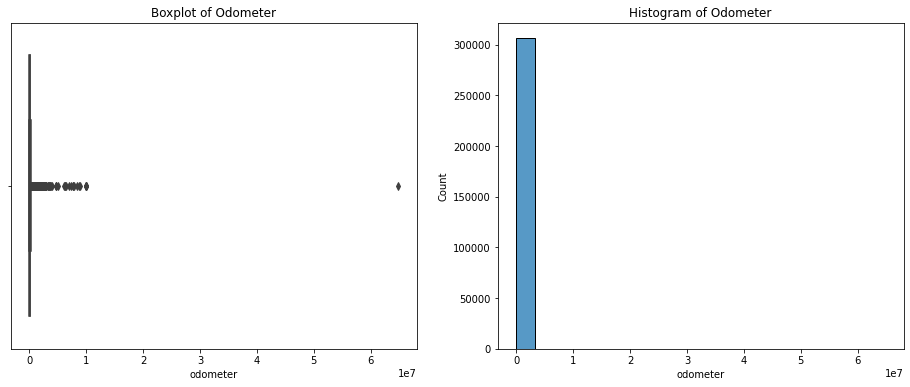

In [ ]:

# boxplot and histogram of odometer feature to better understand the outliers
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='odometer',data=cars_2020)
plt.title('Boxplot of Odometer')
plt.subplot(1,2,2)
sns.histplot(x='odometer',data=cars_2020,bins=20)
plt.title('Histogram of Odometer')
plt.show()

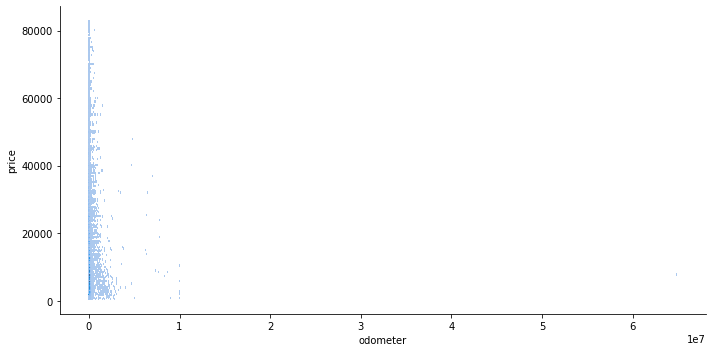

In [ ]:
sns.displot(data=cars_2020, x='odometer',y='price',aspect=2)

Doing some research, we found that Americans drive an average of 13,476 miles per year, according to the Federal Highway Administration. For the lower limit, we accept that there may be some used cars'odometer is pretty low even is 0. So we only use the upper limit result to trim the data.

In [ ]:
cars_2020 = cars_2020[cars_2020['odometer']<400000]

The upper limit of odometer seems reasonable. 

In [ ]:
cars_2020.describe()

,price,year,odometer
count,305283.000000,305283.000000,305283.000000
mean,14018.423466,2010.893820,100559.474294
std,10610.744487,5.622829,61812.419148
min,311.000000,1990.000000,0.000000
25%,5995.000000,2007.000000,49500.500000
50%,11500.000000,2012.000000,96658.000000
75%,18995.000000,2015.000000,141007.500000
max,83000.000000,2020.000000,399961.000000


Now, we have already remove all the outliers of our target variables. Let's see what the dataset looks like now.

In [ ]:
cars_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305283 entries, 0 to 539752
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         305283 non-null  int64  
 1   year          305283 non-null  int64  
 2   manufacturer  296498 non-null  object 
 3   model         302635 non-null  object 
 4   condition     196045 non-null  object 
 5   cylinders     203270 non-null  object 
 6   fuel          303277 non-null  object 
 7   odometer      305283 non-null  float64
 8   title_status  303771 non-null  object 
 9   transmission  303002 non-null  object 
 10  drive         242798 non-null  object 
 11  size          109202 non-null  object 
 12  type          247387 non-null  object 
 13  paint_color   233990 non-null  object 
 14  state         305283 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 37.3+ MB


In [29]:
# saving cleaned data
cars_2020.to_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2020.csv')